In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california_housing.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [5]:
california_housing.data.head()
california_housing.target.head()
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df=california_housing.frame

In [7]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

AveRooms     AveBedrms      AveOccup    Population
count  20640.000000  20640.000000  20640.000000  20640.000000
mean       5.429000      1.096675      3.070655   1425.476744
std        2.474173      0.473911     10.386050   1132.462122
min        0.846154      0.333333      0.692308      3.000000
25%        4.440716      1.006079      2.429741    787.000000
50%        5.229129      1.048780      2.818116   1166.000000
75%        6.052381      1.099526      3.282261   1725.000000
max      141.909091     34.066667   1243.333333  35682.000000

In [8]:
import numpy as np
from scipy.stats import multivariate_normal

def expectation_step(X, Mu, Sigma, Pi):
    n = X.shape[0]
    k = Mu.shape[0]
    r = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            r[i,j] = Pi[j] * multivariate_normal.pdf(X[i,:], Mu[j,:], Sigma[j,:,:])
        r[i,:] /= np.sum(r[i,:])
    return r

def maximization_step(X, r):
    n = X.shape[0]
    k = r.shape[1]
    n_k = np.sum(r, axis=0)
    Mu = np.zeros((k, X.shape[1]))
    Sigma = np.zeros((k, X.shape[1], X.shape[1]))
    Pi = n_k / n
    for j in range(k):
        Mu[j,:] = np.sum(X * r[:,j].reshape(-1,1), axis=0) / n_k[j]
        X_centered = X - Mu[j,:]
        Sigma[j,:,:] = (X_centered.T @ (X_centered * r[:,j].reshape(-1,1))) / n_k[j]
    return Mu, Sigma, Pi

def EM(X, k, max_iter):
    n = X.shape[0]
    d = X.shape[1]
    Mu = np.random.randn(k,d)
    Sigma = np.zeros((k,d,d))
    for j in range(k):
        Sigma[j,:,:] = np.eye(d)
    Pi = np.ones(k) / k
    for i in range(max_iter):
        r = expectation_step(X, Mu, Sigma, Pi)
        Mu, Sigma, Pi = maximization_step(X, r)
    return Mu, Sigma, Pi


In [9]:
pca = PCA(n_components=2)
data_red=pca.fit_transform(df)
scalar=StandardScaler()
data_rem=scalar.fit_transform(data_red)


#( try on differnt data)

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# Generate some sample data
X, y = make_blobs(n_samples=1000, centers=4, random_state=123)
# Fit a k-finite Gaussian mixture model using EM
k = 4
max_iter = 100
Mu, Sigma, Pi = EM(X, k, max_iter)
# Print the estimated means, covariances, and mixing proportions
print("Estimated means:\n", Mu)
print("Estimated covariances:\n", Sigma)
print("Estimated mixing proportions:\n", Pi)

# Plot the data and the estimated clusters
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[y==i,0], X[y==i,1], color=colors[i], alpha=0.5, label="Cluster {}".format(i+1))
    plt.scatter(Mu[i,0], Mu[i,1], marker="x", color=colors[i], s=100)
plt.legend()
plt.title("Gaussian Mixture Model with EM Algorithm")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


Estimated means:
 [[ 9.70021977  4.08903759]
 [-5.53497129  0.99356653]
 [ 4.23152101 -2.9317782 ]
 [ 8.96245428  3.08091537]]
Estimated covariances:
 [[[ 0.75951663 -0.02433697]
  [-0.02433697  0.69382087]]

 [[ 1.02481179 -0.00879906]
  [-0.00879906  0.97060152]]

 [[ 1.02283906  0.46923906]
  [ 0.46923906  2.896101  ]]

 [[ 1.04954631 -0.43379787]
  [-0.43379787  0.7710952 ]]]
Estimated mixing proportions:
 [0.16969806 0.25       0.5010088  0.07929314]


In [11]:
df=pd.DataFrame(data_rem)

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA

# Load the California Housing Dataset
california = fetch_california_housing(as_frame=True)
X = california.data

# Perform PCA to reduce the dimensionality to 2


For k=2, Silhouette Score: 0.5106934204068556


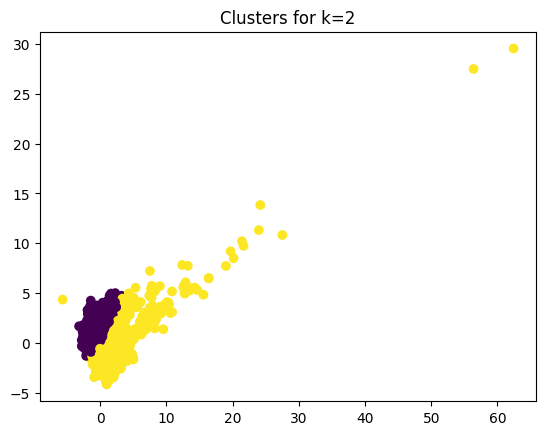

Cluster 1:
	Mean: 0.012514024214966309
	Standard Deviation: 0.9135273811248535
	Mixing Coefficient: 0.5474806201550387
Cluster 2:
	Mean: -0.015140093536310578
	Standard Deviation: 1.0953412516606744
	Mixing Coefficient: 0.45251937984496127
For k=3, Silhouette Score: 0.5117375527238701


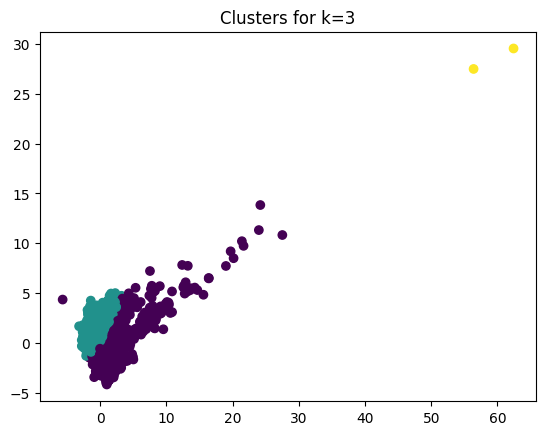

Cluster 1:
	Mean: -0.017760366039940117
	Standard Deviation: 1.0211212721432608
	Mixing Coefficient: 0.45256782945736435
Cluster 2:
	Mean: 0.01242206181794389
	Standard Deviation: 0.9134780073189988
	Mixing Coefficient: 0.5473352713178294
Cluster 3:
	Mean: 12.783773410873534
	Standard Deviation: 23.89575128428387
	Mixing Coefficient: 9.689922480620155e-05
For k=4, Silhouette Score: 0.5091162012524202


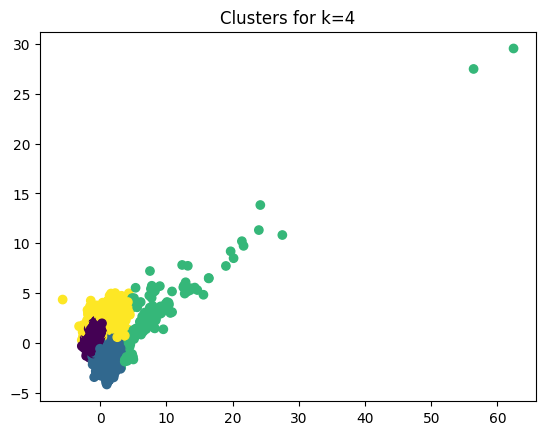

Cluster 1:
	Mean: -0.041787408212554264
	Standard Deviation: 0.837932874528171
	Mixing Coefficient: 0.49060077519379847
Cluster 2:
	Mean: -0.0625056279001816
	Standard Deviation: 0.8541245645698858
	Mixing Coefficient: 0.42805232558139533
Cluster 3:
	Mean: 1.7574234042668186
	Standard Deviation: 5.35383223812177
	Mixing Coefficient: 0.005717054263565891
Cluster 4:
	Mean: 0.4919926690294189
	Standard Deviation: 1.3648925993613883
	Mixing Coefficient: 0.07562984496124031


In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Download the California Housing dataset
data = fetch_california_housing(as_frame=True).frame

# Perform PCA to reduce dimensions to 2
scalar=StandardScaler()
data=scalar.fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Find clusters for k=2,3,4 using GMM
for k in range(2,5):
    gmm = GaussianMixture(n_components=k)
    clusters = gmm.fit_predict(data_pca)
    # Compute Silhouette Score
    silhouette_avg = silhouette_score(data_pca, clusters)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

    # Plot the clusters
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f"Clusters for k={k}")
    plt.show()

    # Print the means, standard deviations, and mixing coefficients of the GMM
    for j in range(k):
        mask = (clusters == j)
        cluster_data = data[mask]
        print(f"Cluster {j+1}:")
        print(f"\tMean: {np.mean(cluster_data)}")
        print(f"\tStandard Deviation: {np.std(cluster_data)}")
        print(f"\tMixing Coefficient: {len(cluster_data)/len(data)}")


In [14]:
data 

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]